In [1]:
from api_call import *
service = get_gmail_service()

get_all_emails_and_save_as_json(service)
# get_emails_after_date(service, datetime(2024, 3, 20))

Total number of messages: 2100


Processing emails:   7%|▋         | 157/2100 [00:25<06:15,  5.18it/s]

KeyboardInterrupt: 

In [4]:
import re
import json
from utils import fecDatabaseUtil
# helper function to extract email addresses from string
def extract_email_addresses(str):
    email_pattern = re.compile(r'<([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)>')
    emails = email_pattern.findall(str)
    # if no email address was found, return the original string
    if len(emails) == 0:
        return str
    return emails[0]

candidates_and_emails = '../data/Candidates_Emails.json'
with open(candidates_and_emails, 'r', encoding='utf-8') as email_book:
    candidate_email_dict = json.load(email_book)

# Create an empty dictionary
email_content_dict = {}
emails_all = []
with open('../data/emails_extracted.json', 'r', encoding='utf-8') as json_file:
    emails_all = json.load(json_file)

# Iterate through all emails
for email in emails_all:
    # Use email address as key and content as value
    if extract_email_addresses(email['from']) not in email_content_dict:
        email_content_dict[extract_email_addresses(email['from'])] = []
    email_content_dict[extract_email_addresses(email['from'])].append(email['content_plain'])

email_content_dict

Jacky Rosen ('NV', 'DEMOCRATIC')


In [21]:
import os
from bs4 import BeautifulSoup, Comment

json_file_path = '../data/emails_extracted.json'
with open(json_file_path, 'r', encoding='utf-8') as json_file:
    emails_all = json.load(json_file)

output_text_file_path = '../data/email_contents_plain.txt'
if os.path.exists(output_text_file_path):
    os.remove(output_text_file_path)  # Remove the file if it already exists

# Process the mbox and write email contents to a text file
for detail in emails_all:
    with open(output_text_file_path, 'a', encoding='utf-8') as file:
        if detail['content_plain']:
            # remove empty lines
            detail['content_plain'] = '\n'.join([line for line in detail['content_plain'].split('\n') if line.strip() != ''])
            file.write(detail['content_plain'] + '\n\n')
        # if detail['content_html']:
        #     bs = BeautifulSoup(detail['content_html'], 'html.parser')

        #     # Remove <script> and <style> tags and their contents
        #     for script in bs(["script", "style"]):
        #         script.decompose()

        #     # Remove comments
        #     for comment in bs.findAll(text=lambda text: isinstance(text, Comment)):
        #         comment.extract()

        #     raw_text = bs.get_text()
        #     # remove empty lines
        #     raw_text = '\n'.join([line for line in raw_text.split('\n') if line.strip() != ''])
        #     file.write(raw_text + '\n\n')
        file.write('=========================================') # Separate emails with a line

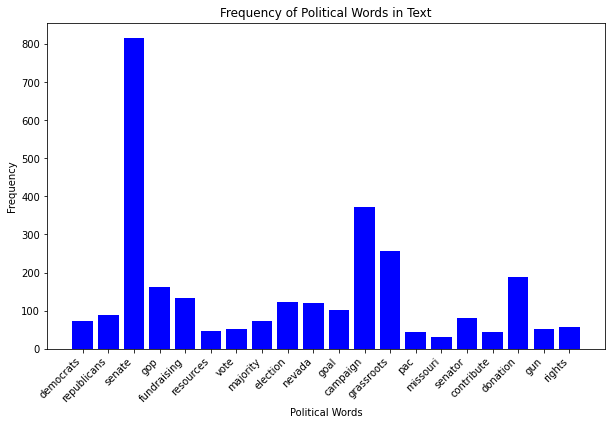

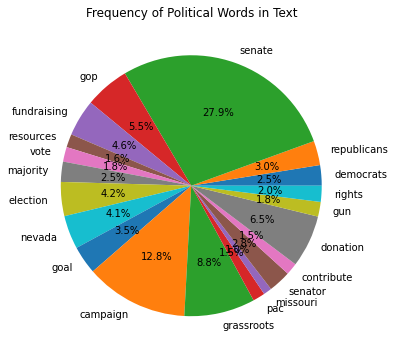

In [22]:
from matplotlib import pyplot as plt

political_words = ['democrats', 'republicans', 'senate', 'gop', 'fundraising', 'resources', 'vote', 'majority', 'election', 'nevada',  'goal', 'campaign', 'grassroots', 'pac', 'missouri', 'senator', 'contribute', 'donation', 'gun', 'rights']

# Load the provided text to scan for these words
text_path = "../data/email_contents_plain.txt"
with open(text_path, 'r', encoding='utf-8') as file:
    str = file.read().lower()  # Convert text to lowercase to match case-insensitively

# Tokenize the text and count the frequency of each political word
from collections import Counter
word_counts = Counter(str.split())
political_word_frequencies = {word: word_counts[word] for word in political_words if word in word_counts}

# Extract words and their frequencies for plotting
words = list(political_word_frequencies.keys())
frequencies = list(political_word_frequencies.values())

plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='blue')
plt.xlabel('Political Words')
plt.ylabel('Frequency')
plt.title('Frequency of Political Words in Text')
plt.xticks(rotation=45, ha="right")
# save the bar chart
plt.savefig('../result/political_words_bar_chart.png')
plt.show()
# pie chart
plt.figure(figsize=(10, 6))
plt.pie(frequencies, labels=words, autopct='%1.1f%%')
plt.title('Frequency of Political Words in Text')
# save the pie chart
plt.savefig('../result/political_words_pie_chart.png')
plt.show()

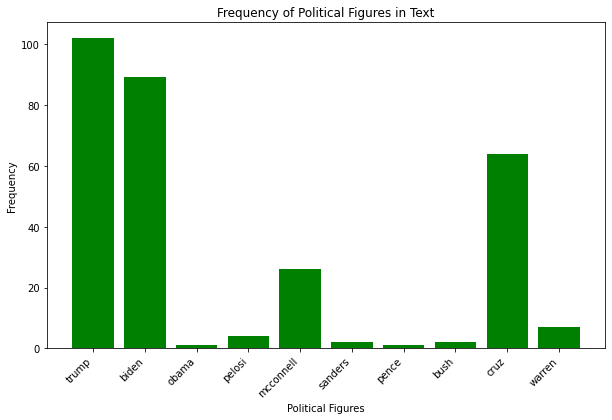

<Figure size 720x432 with 0 Axes>

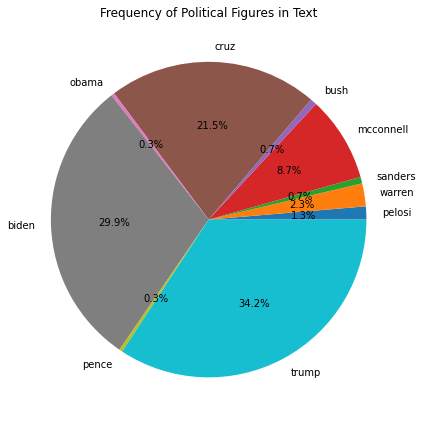

In [23]:
political_figures = ['trump', 'biden', 'obama', 'clinton', 'pelosi', 'mcconnell', 'sanders', 'harris', 'pence', 'romney', 'bush', 'cruz', 'warren', 'soros', 'koch', 'soros', 'koch', 'putin', 'xi', 'kim', 'merkel', 'macron', 'trudeau', 'modi', 'abe', 'erdogan']
political_figures = [figure.lower() for figure in political_figures]
political_figures_frequencies = {figure: word_counts[figure] for figure in political_figures if figure in word_counts}

# Extract figures and their frequencies for plotting
figures = list(political_figures_frequencies.keys())
frequencies = list(political_figures_frequencies.values())

sorted_figures_frequencies = sorted(zip(figures, frequencies), key=lambda x: x[1], reverse=True)

adjusted_figures = []
adjusted_frequencies = []
for i in range(len(sorted_figures_frequencies)):
    if i % 2 == 0:
        adjusted_figures.append(sorted_figures_frequencies[len(sorted_figures_frequencies)//2 + i//2][0])
        adjusted_frequencies.append(sorted_figures_frequencies[len(sorted_figures_frequencies)//2 + i//2][1])
    else:
        adjusted_figures.append(sorted_figures_frequencies[len(sorted_figures_frequencies)//2 - (i//2 + 1)][0])
        adjusted_frequencies.append(sorted_figures_frequencies[len(sorted_figures_frequencies)//2 - (i//2 + 1)][1])

plt.figure(figsize=(10, 6))
plt.bar(figures, frequencies, color='green')
plt.xlabel('Political Figures')
plt.ylabel('Frequency')
plt.title('Frequency of Political Figures in Text')
plt.xticks(rotation=45, ha="right")
# save the bar chart
plt.savefig('../result/political_figures_bar_chart.png')
plt.show()
plt.figure(figsize=(10, 6))
# pie chart
plt.figure(figsize=(10, 6))
# plt.pie(frequencies, labels=figures, autopct='%1.1f%%')
plt.pie(adjusted_frequencies, labels=adjusted_figures, autopct='%1.1f%%')
plt.title('Frequency of Political Figures in Text')
plt.tight_layout()
# save the pie chart
plt.savefig('../result/political_figures_pie_chart.png')
plt.show()

TypeError: Axes.pie() missing 1 required positional argument: 'x'

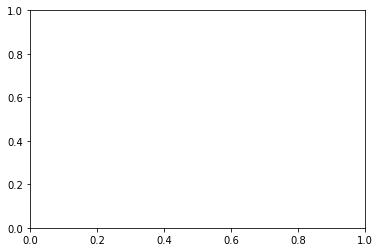

In [25]:
# Count the words, links and images in the HTML content and raw text
html_content = [email['content_html'] for email in emails_all if email['content_html']]
raw_text = [email['content_plain'] for email in emails_all if email['content_plain']]
html_content = ' '.join(html_content)
raw_text = ' '.join(raw_text)

# Count the words, links and images in the HTML content and raw text
from bs4 import BeautifulSoup
bs = BeautifulSoup(html_content, 'html.parser')
html_words = bs.get_text().split()
html_links = [link.get('href') for link in bs.find_all('a', href=True)]
html_images = [image.get('src') for image in bs.find_all('img', src=True)]

# Count the words in the raw text
raw_text_words = raw_text.split()

# Plot them
html_word_count = len(html_words)
raw_text_word_count = len(raw_text_words)
# Merge the word counts
total_word_count = html_word_count + raw_text_word_count

# Create lists for the pie chart
labels = ['HTML Words', 'Raw Text Words']
counts = [html_word_count, raw_text_word_count]

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(counts, labels=labels, autopct='%1.1f%%')

# Add a title
ax.set_title('Word Counts in HTML Content and Raw Text')

# save the pie chart
plt.savefig('../result/word_counts_pie_chart.png')
plt.show()

# Merge all words together
all_words = html_words + raw_text_words
all_word_count = len(all_words)

# Count the number of links and images
html_link_count = len(html_links)
html_image_count = len(html_images)

# Create lists for the pie chart
labels = ['Words', 'Links', 'Images']
counts = [all_word_count, html_link_count, html_image_count]

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(counts, labels=labels, autopct='%1.1f%%')

# Add a title
ax.set_title('Counts of Words, Links, and Images')

# save the pie chart
plt.savefig('../result/word_link_image_counts_pie_chart.png')
plt.show()